In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# 데이터 확인

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


# 결측치 처리: 회귀 대체 (Regression Imputation)

In [6]:
# 1. 상관계수 확인 (근거 확보)
corr = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr().iloc[0, 1]
print(f"Daparture Delay과 Arrival Delay의 상관계수: {corr:.4f} ")


Daparture Delay과 Arrival Delay의 상관계수: 0.9655 


In [7]:

# 2. 모델 학습을 위한 데이터셋 분리
train_set = df.dropna(subset=['Arrival Delay in Minutes']) # 정답이 있는 데이터
missing_set = df[df['Arrival Delay in Minutes'].isnull()]  # 채워야 할 데이터

X_train = train_set[['Departure Delay in Minutes']]
y_train = train_set['Arrival Delay in Minutes']
X_missing = missing_set[['Departure Delay in Minutes']]


In [8]:

# 3. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# 4. 결측치 예측 및 채우기
predicted_delays = model.predict(X_missing)


In [10]:
# 예측값이 음수가 나오면 0으로 보정 (지연 시간이 마이너스일 순 없으므로)
predicted_delays = np.where(predicted_delays < 0, 0, predicted_delays)

df.loc[missing_set.index, 'Arrival Delay in Minutes'] = predicted_delays

print("결측치 개수")
print(df.isnull().sum())
print('-' * 50)
print(df.describe())


결측치 개수
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
-----

# 스케일링

In [11]:
from sklearn.preprocessing import StandardScaler

target_cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for col in target_cols:
    df[f'{col}_Log'] = np.log1p(df[col])

scaler = StandardScaler()
log_cols = [f'{col}_Log' for col in target_cols]
df[log_cols] = scaler.fit_transform(df[log_cols])

print(df[log_cols].describe().round(2))

       Flight Distance_Log  Departure Delay in Minutes_Log  \
count            103904.00                       103904.00   
mean                 -0.00                           -0.00   
std                   1.00                            1.00   
min                  -3.54                           -0.76   
25%                  -0.74                           -0.76   
50%                   0.04                           -0.76   
75%                   0.83                            0.82   
max                   1.98                            3.79   

       Arrival Delay in Minutes_Log  
count                     103904.00  
mean                          -0.00  
std                            1.00  
min                           -0.78  
25%                           -0.78  
50%                           -0.78  
75%                            0.84  
max                            3.74  


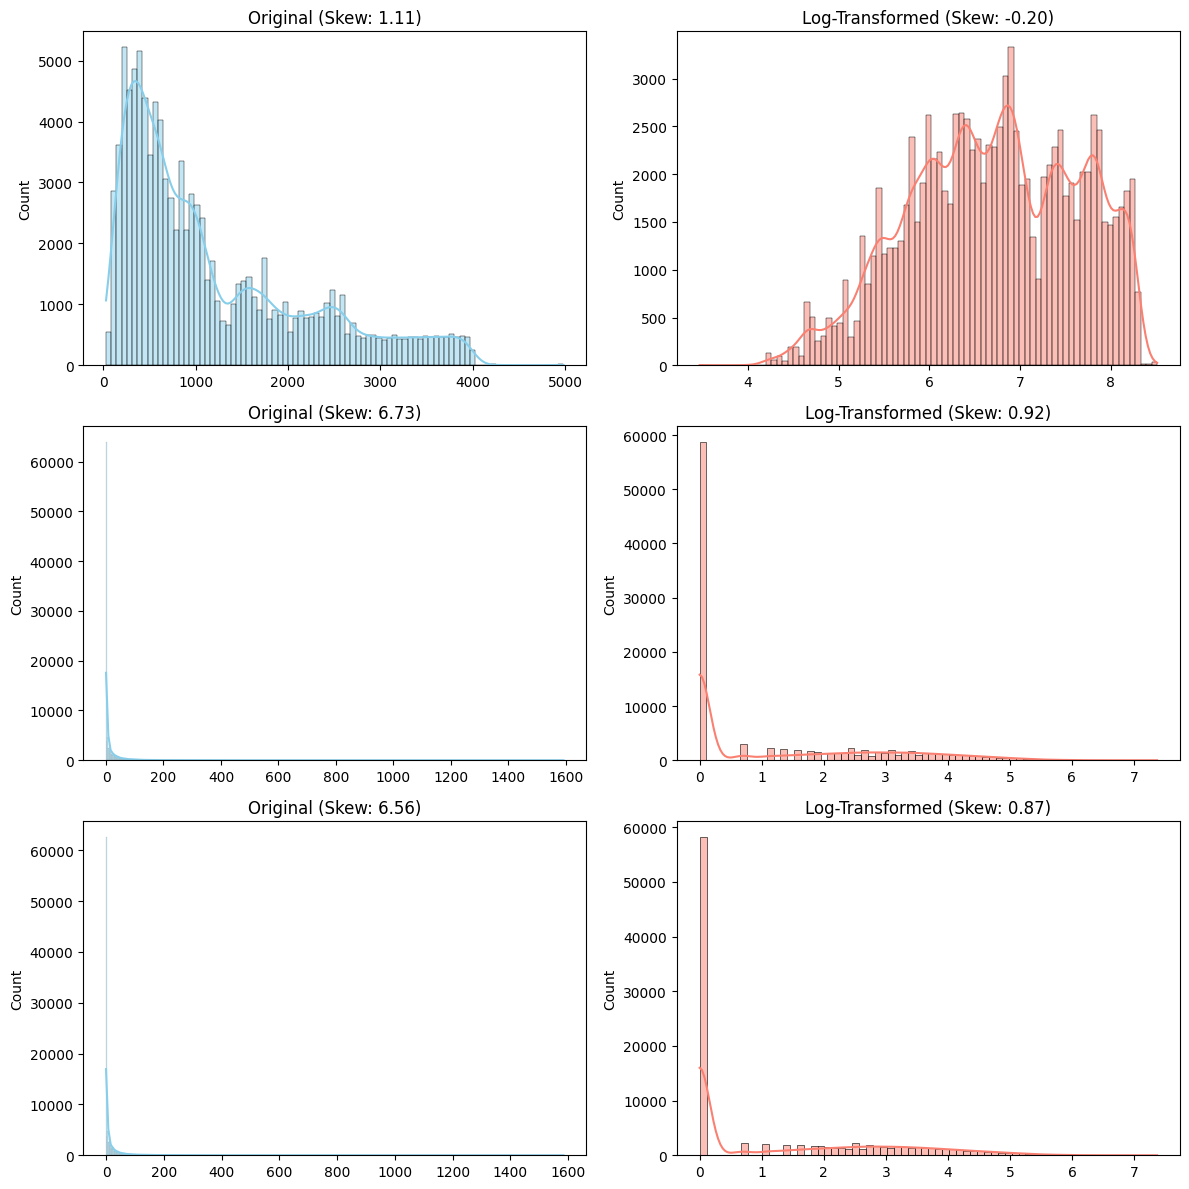

In [17]:
from scipy import stats

# Columns to check
target_cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Set up the plotting area
fig, axes = plt.subplots(len(target_cols), 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(target_cols):
    # 1. Original Distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Original: {col}')
    axes[i, 0].set_xlabel('')

    # 2. Log-Transformed Distribution
    # Apply log1p
    log_data = np.log1p(df[col])
    sns.histplot(log_data, kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'Log-Transformed: {col}')
    axes[i, 1].set_xlabel('')

    # Optional: Add skewness value to title
    axes[i, 0].set_title(f'Original (Skew: {df[col].skew():.2f})')
    axes[i, 1].set_title(f'Log-Transformed (Skew: {log_data.skew():.2f})')

plt.tight_layout()
plt.savefig('distribution_check.png')

# 피처 엔지니어링 (Feature Engineering)

In [12]:

# (1) 총 지연 시간 (Total Delay)
df['Total_Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

# (2) 서비스 그룹핑 (점수화)
df['Hard_Service_Score'] = (df['Seat comfort'] + df['Food and drink'] + 
                            df['Leg room service'] + df['Inflight entertainment']) / 4

df['Soft_Service_Score'] = (df['On-board service'] + df['Checkin service'] + 
                            df['Baggage handling'] + df['Gate location']) / 4

df['Tech_Score'] = (df['Inflight wifi service'] + df['Ease of Online booking'] + 
                    df['Online boarding']) / 3

# (3) 고객 페르소나 (Persona) 정의
def define_persona(row):
    
    if row['Type of Travel'] == 'Business travel' and row['Class'] == 'Business':
        return 'VIP_Business' # 돈 많이 쓰고 까다로운 고객
    elif row['Type of Travel'] == 'Personal Travel':
        return 'Vacationer'   # 놀러 가는 들뜬 고객
    else:
        return 'Standard_Traveler' # 일반적인 출장/이동

df['Customer_Persona'] = df.apply(define_persona, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [13]:
# 만족(satisfied) = 1, 불만족 = 0 으로 변환 (머신러닝/상관분석용)
df['satisfaction_score'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [14]:
from feature.age_group import AgeGrouper
from feature.delay_severity import Delay_Severity
from feature.Flight_Range import FlightRangeProcessor
from feature.Flight_Range import TechScoreProcessor

flight_processor = FlightRangeProcessor()
delay_processor = Delay_Severity()
age_processor = AgeGrouper()
tech_processor = TechScoreProcessor()

df = flight_processor.process(df)
df = delay_processor.add_delay_severity(df)
df = age_processor.process(df)
df = tech_processor.process(df)

print(df[['Flight_Range','Delay_Severity', 'Age_Group', 'Tech_score_range']].head())

Processing Flight Range...
  Flight_Range  Delay_Severity    Age_Group Tech_score_range
0   Short_Haul        9.347826        Youth             good
1   Short_Haul        2.978723  Young_Adult             good
2  Medium_Haul        0.000000  Young_Adult             good
3   Short_Haul        3.558719  Young_Adult             good
4   Short_Haul        0.000000       Senior             good


In [15]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Flight Distance_Log', 'Departure Delay in Minutes_Log',
       'Arrival Delay in Minutes_Log', 'Total_Delay', 'Hard_Service_Score',
       'Soft_Service_Score', 'Tech_Score', 'Customer_Persona',
       'satisfaction_score', 'Flight_Range', 'Delay_Severity', 'Age_Group',
       'Tech_score_range'],
      dtype='object')

In [16]:
output = 'data/preprocessed_data.csv'
df.to_csv(output, index=False, encoding='utf-8-sig')

saved_df = pd.read_csv(output)
print(saved_df.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Flight Distance_Log', 'Departure Delay in Minutes_Log',
       'Arrival Delay in Minutes_Log', 'Total_Delay', 'Hard_Service_Score',
       'Soft_Service_Score', 'Tech_Score', 'Customer_Persona',
       'satisfaction_score', 'Flight_Range', 'Delay_Severity', 'Age_Group',
       'Tech_score_range'],
      dtype='object')
